In [1]:
!pip3 install tensorflow

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

Dane testowe:
   - Testowany był eksperymentalny lek na osobach w wieku od 13 do 100 lat w badaniu klinicznym.
   - Badanie miało 2100 uczestników. Połowa była w wieku poniżej 65 lat, połowa 65 lat lub starsza.
   - Około 95% pacjentów w wieku 65 lat lub starszych doświadczyło skutków ubocznych.
   - Około 95% pacjentów poniżej 65 roku życia nie doświadczyło żadnych skutków ubocznych.

In [12]:
train_samples = []

In [13]:
train_labels = []

In [14]:
for i in range(50):
   # Około ~5% młodszych osób, które doświadczyły skutków ubocznych
   random_younger = randint(13,64)
   train_samples.append(random_younger)
   train_labels.append(1)

   # Około ~5% starszych osób, które nie doświadczyły skutków ubocznych
   random_older = randint(65, 100)
   train_samples.append(random_older)
   train_labels.append(0)

for i in range(1000):
    # Około ~95% młodszych osób, które nie doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # Około ~95% starszych osób, u które doświadczyły skutków ubocznych
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [15]:
print(train_samples)

[59, 78, 33, 99, 35, 81, 20, 89, 44, 72, 20, 68, 29, 76, 54, 99, 43, 89, 60, 76, 13, 71, 18, 80, 29, 65, 50, 94, 27, 83, 64, 82, 48, 96, 41, 70, 49, 79, 15, 87, 61, 68, 13, 94, 24, 67, 40, 81, 59, 85, 36, 71, 41, 77, 23, 68, 60, 82, 34, 95, 21, 70, 21, 70, 34, 84, 23, 83, 20, 87, 27, 97, 24, 81, 48, 95, 64, 65, 26, 79, 48, 65, 44, 93, 27, 92, 38, 84, 26, 95, 35, 67, 63, 85, 64, 75, 32, 89, 48, 100, 53, 73, 22, 96, 16, 88, 53, 87, 22, 88, 59, 66, 40, 91, 30, 80, 60, 87, 42, 77, 55, 65, 35, 76, 50, 82, 34, 67, 52, 89, 15, 85, 39, 72, 35, 80, 53, 92, 20, 87, 15, 70, 54, 82, 42, 97, 41, 90, 45, 81, 60, 82, 52, 72, 60, 78, 55, 84, 17, 95, 22, 76, 28, 70, 62, 91, 64, 73, 58, 79, 43, 68, 28, 94, 35, 89, 26, 96, 22, 100, 15, 65, 17, 76, 48, 95, 19, 90, 25, 93, 53, 90, 13, 68, 31, 99, 28, 77, 53, 99, 37, 68, 61, 70, 34, 71, 48, 92, 41, 76, 21, 95, 61, 79, 52, 92, 27, 73, 35, 82, 31, 74, 44, 97, 52, 90, 13, 71, 48, 88, 62, 100, 45, 97, 21, 90, 24, 91, 27, 89, 33, 83, 17, 90, 40, 82, 14, 79, 34, 

In [16]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [17]:
# Przekształcenie w tablice NumPy
train_labels = np.array(train_labels)
# Przekształcenie w tablice NumPy
train_samples = np.array(train_samples)

In [18]:
print(train_samples)
print(train_labels)

[59 78 33 ... 82 22 74]
[1 0 1 ... 1 0 1]


In [19]:
train_labels, train_samples = shuffle(train_labels, train_samples)

In [20]:
print(train_samples)
print(train_labels)

[44 60 63 ... 39 66 44]
[0 0 0 ... 0 1 0]


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [23]:
print(scaled_train_samples)

[[0.35632184]
 [0.54022989]
 [0.57471264]
 ...
 [0.29885057]
 [0.6091954 ]
 [0.35632184]]


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [25]:
# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.
# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow
# do korzystania z określonych urządzeń sprzętowych.
physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne
if physical_devices:
    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.
    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie
    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.
    print("Num GPUs Available: ", len(physical_devices))
else:
    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.
    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [26]:
model = Sequential([
    Input(shape=(1,)),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
]
)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6769 - accuracy: 0.5367 - 1s/epoch - 6ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6459 - accuracy: 0.6857 - 330ms/epoch - 2ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6129 - accuracy: 0.7457 - 311ms/epoch - 1ms/step
Epoch 4/30
210/210 - 0s - loss: 0.5809 - accuracy: 0.7643 - 318ms/epoch - 2ms/step
Epoch 5/30
210/210 - 0s - loss: 0.5483 - accuracy: 0.8014 - 318ms/epoch - 2ms/step
Epoch 6/30
210/210 - 0s - loss: 0.5157 - accuracy: 0.8243 - 309ms/epoch - 1ms/step
Epoch 7/30
210/210 - 0s - loss: 0.4844 - accuracy: 0.8410 - 306ms/epoch - 1ms/step
Epoch 8/30
210/210 - 0s - loss: 0.4547 - accuracy: 0.8529 - 308ms/epoch - 1ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4272 - accuracy: 0.8738 - 325ms/epoch - 2ms/step
Epoch 10/30
210/210 - 0s - loss: 0.4024 - accuracy: 0.8862 - 312ms/epoch - 1ms/step
Epoch 11/30
210/210 - 0s - loss: 0.3803 - accuracy: 0.8967 - 325ms/epoch - 2ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3609 - accuracy: 0.9033 - 292ms/epoch - 1ms/step
Epoc

In [35]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2120 - accuracy: 0.9476 - val_loss: 0.1606 - val_accuracy: 0.9571 - 646ms/epoch - 3ms/step
Epoch 2/30
189/189 - 1s - loss: 0.2121 - accuracy: 0.9455 - val_loss: 0.1606 - val_accuracy: 0.9571 - 573ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.2119 - accuracy: 0.9476 - val_loss: 0.1602 - val_accuracy: 0.9571 - 576ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.2118 - accuracy: 0.9439 - val_loss: 0.1607 - val_accuracy: 0.9571 - 648ms/epoch - 3ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2118 - accuracy: 0.9444 - val_loss: 0.1607 - val_accuracy: 0.9571 - 362ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2117 - accuracy: 0.9439 - val_loss: 0.1602 - val_accuracy: 0.9571 - 408ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2117 - accuracy: 0.9439 - val_loss: 0.1603 - val_accuracy: 0.9571 - 414ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2116 - accuracy: 0.9460 - val_loss: 0.1599 - val_accuracy: 0.9571 - 388ms/epoch - 2ms/step


In [36]:
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [37]:
for i in predictions:
    print(i)

[0.9586715  0.04132848]
[0.90972173 0.09027825]
[0.6488588  0.35114133]
[0.9478342 0.0521659]
[0.02184234 0.97815764]
[0.86133105 0.13866888]
[0.06557687 0.93442315]
[0.02052369 0.9794762 ]
[0.01811609 0.9818839 ]
[0.90972173 0.09027825]
[0.9483484  0.05165156]
[0.09321464 0.9067854 ]
[0.03167269 0.9683272 ]
[0.955926   0.04407407]
[0.95654345 0.04345636]
[0.22568034 0.7743197 ]
[0.11706404 0.88293606]
[0.94986284 0.05013717]
[0.95323443 0.0467656 ]
[0.09873287 0.9012672 ]
[0.02799458 0.97200537]
[0.95783204 0.04216797]
[0.22568034 0.7743197 ]
[0.07828691 0.9217131 ]
[0.9568494  0.04315063]
[0.01928308 0.9807168 ]
[0.86133105 0.13866888]
[0.01811609 0.9818838 ]
[0.05160385 0.9483962 ]
[0.07381781 0.9261822 ]
[0.04572045 0.95427954]
[0.9596154  0.04038463]
[0.11706404 0.88293606]
[0.9546124  0.04538759]
[0.08300235 0.9169977 ]
[0.9576906  0.04230946]
[0.03167269 0.9683272 ]
[0.9590852  0.04091475]
[0.07381781 0.9261822 ]
[0.94783413 0.0521659 ]
[0.02473269 0.97526735]
[0.09321464 0.9067

In [38]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [39]:
for i in rounded_predictions:
    print(i)

0
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
1
0
0
1
1
0
1
1
0
1
0
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
1
1
0
1
1
1
0
1
1
0
0
1
1
0
1
1
0
1
0
1
0
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
1
0
0
0
1
0
1
1
1
1
0
0
1
0
1
1
0
1
0
0
1
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
1
0
0
1
0
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
1
1
1
1
1
0
0
1
1
0
0
1
0
1
0
1
1
1
1
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
0
0
1
1
0
1
0
0
1
0
1
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
1
0
0
1
1
1
1
1
1
0
1
0
1
0
1
1
1
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
1
1
0
0
0
1
0
0
1
1
0
1
1
1
0
0
1
1
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
0
1
0
1
1
0
1
1
1
1
0
0
0
1
1
1
1
0
1
0
0
0
0
0
1
0
0
1


In [40]:
# Włączenie integracji matplotlib z notatnikiem Jupyter, pozwalające na wyświetlanie wykresów bezpośrednio pod komórkami kodu.
%matplotlib inline

# Importowanie funkcji confusion_matrix z modułu sklearn.metrics.
# Confusion matrix (macierz błędów) to narzędzie do oceny wydajności modelu klasyfikacyjnego,
# prezentujące liczby predykcji dla każdej klasy w stosunku do rzeczywistych etykiet.
from sklearn.metrics import confusion_matrix

# Importowanie modułu itertools, który oferuje różne funkcje pomocnicze optymalizujące
# iteracyjne zadania (takie jak produkty kartezjańskie, permutacje, kombinacje itp.).
import itertools

# Importowanie biblioteki matplotlib.pyplot jako plt.
# Matplotlib to biblioteka do tworzenia statycznych, interaktywnych wykresów i wizualizacji w Pythonie.
import matplotlib.pyplot as plt

In [41]:
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)

In [42]:
# Definicja funkcji plot_confusion_matrix z parametrami: macierz błędów (cm), lista nazw klas, flaga normalizacji,
# tytuł wykresu i mapa kolorów.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz Pomyłek',
                          cmap=plt.cm.Blues):

    # Wieloliniowy komentarz dokumentujący funkcję, opisujący jej działanie i parametry.
    """
    To funkcja drukuje i wyświetla macierz pomyłek.
    Normalizację można zastosować, ustawiając normalize=True.
    """

    # Wyświetlenie macierzy pomyłek jako obrazu z wykorzystaniem mapy kolorów cmap.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Ustawienie tytułu wykresu.
    plt.title(title)

    # Dodanie paska kolorów (colorbar), który pokazuje zakres wartości reprezentowanych przez kolory na mapie.
    plt.colorbar()

    # Ustalenie pozycji, na których mają być wyświetlane etykiety (tutaj dla klas).
    tick_marks = np.arange(len(classes))

    # Ustawienie etykiet osi X z nazwami klas, obrót etykiet o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)

    # Ustawienie etykiet osi Y z nazwami klas.
    plt.yticks(tick_marks, classes)

    # Warunek sprawdzający, czy użytkownik chce znormalizować macierz pomyłek.
    if normalize:
        # Normalizacja wartości macierzy pomyłek, dzielenie każdego wiersza przez sumę wartości w wierszu,
        # przekształcając liczby w prawdopodobieństwa.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # Wydrukowanie informacji o normalizacji.
        print("Znormalizowana macierz pomyłek")
    else:
        # Wydrukowanie informacji, że macierz nie jest normalizowana.
        print('Macierz pomyłek, bez normalizacji')

    # Wydrukowanie wartości macierzy pomyłek w konsoli.
    print(cm)

    # Ustalenie progu dla decyzji o kolorze tekstu na podstawie maksymalnej wartości w macierzy.
    thresh = cm.max() / 2.

    # Iterowanie przez elementy macierzy (indeksy i wartości), aby dodać teksty do każdego pola macierzy.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodanie tekstu do każdego pola macierzy, gdzie tekst jest sformatowany jako liczba zmiennoprzecinkowa
        # z dwoma miejscami po przecinku. Ustawienie tekstu na środku pola.
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 # Ustawienie koloru tekstu na biały, jeśli wartość jest większa niż połowa maksimum,
                 # w przeciwnym przypadku kolor czarny dla lepszej czytelności.
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustowanie układu elementów na wykresie, by wszystkie elementy były dobrze widoczne i nie nakładały się na siebie.
    plt.tight_layout()

    # Dodanie etykiety osi Y opisującej, co reprezentują wartości na tej osi (prawdziwe klasy).
    plt.ylabel('Prawdziwa etykieta')

    # Dodanie etykiety osi X opisującej, co reprezentują wartości na tej osi (przewidziane klasy).
    plt.xlabel('Przewidziana etykieta')



Znormalizowana macierz pomyłek
[[0.9352381 0.0647619]
 [0.0447619 0.9552381]]


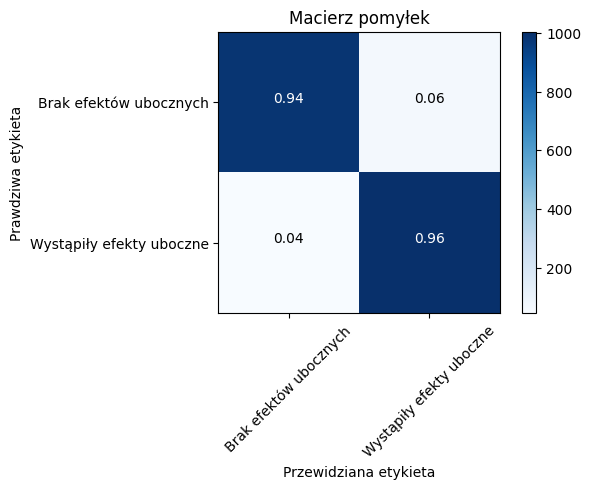

In [44]:
cm_plot_labels = ["Brak efektów ubocznych", "Wystąpiły efekty uboczne"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Macierz pomyłek", normalize=True)